In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from tqdm import tqdm
import mmo_utils as ommt
import matplotlib.pyplot as plt
from pyarrow import dataset as ds
import ray

In [3]:
my_runtime_env = {"working_dir": "."}

In [4]:
if ray.is_initialized():
    ray.shutdown()
ray.init(runtime_env=my_runtime_env, ignore_reinit_error=True)


2023-01-15 14:52:35,053	INFO worker.py:1230 -- Using address localhost:9031 set in the environment variable RAY_ADDRESS
2023-01-15 14:52:35,365	INFO worker.py:1352 -- Connecting to existing Ray cluster at address: 172.31.133.189:9031...
2023-01-15 14:52:35,408	INFO worker.py:1529 -- Connected to Ray cluster. View the dashboard at https://console.anyscale.com/api/v2/sessions/ses_rut7hmhre9n99e1valzhcmjhnt/services?redirect_to=dashboard 
2023-01-15 14:52:35,414	INFO packaging.py:546 -- Creating a file package for local directory '.'.
2023-01-15 14:52:35,418	INFO packaging.py:373 -- Pushing file package 'gcs://_ray_pkg_70601abf57a2c24c.zip' (0.28MiB) to Ray cluster...
2023-01-15 14:52:35,421	INFO packaging.py:386 -- Successfully pushed file package 'gcs://_ray_pkg_70601abf57a2c24c.zip'.


Python version:,3.10.4
Ray version:,2.2.0
Dashboard:,http://console.anyscale.com/api/v2/sessions/ses_rut7hmhre9n99e1valzhcmjhnt/services?redirect_to=dashboard


In [5]:
# Let's read the data as pyarrow table
dataset = ds.dataset(
        "s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/",
        partitioning=["year", "month"],
)

In [6]:
# Let's use three sklearn estimator models
models = [LinearRegression(), 
          DecisionTreeRegressor(),
          DecisionTreeRegressor(splitter="random"),
        ]

# Define batch sizes and tracking list 
all_stats_times = []
# starting_indexes = [-3, -6, -9]
starting_indexes = [-3, -6, -9, -12, -15, -18]

In [7]:
for starting_idx in tqdm(starting_indexes):
    files = [f"s3://anonymous@{file}" for file in tqdm(dataset.files)][starting_idx:]
    print(f"Total files obtained {len(files)}")
    results, time_stats = ommt.run_batch_training_with_object_store(files, models=models)
    all_stats_times.append(time_stats)
    print(f"Sample of results: {results[:-1][0]}")
    print("", flush=True)
    print(f"Total number of pickup locations: {time_stats['total_pickup_locations']}")
    print(f"Total number of pickup locations with enough records to train: {time_stats['total_pickup_locations_trained']}")
    print(f"Total number of models trained: {time_stats['total_models_trained']}")
    print(f"TOTAL TIME TAKEN: {time_stats['total_training_time']} seconds")
    print("--" * 10)

100%|██████████| 18/18 [00:00<00:00, 359511.77it/s]


Total files obtained 3
Starting optimized run: each task fetching pre-loaded data from Ray object store...
(scheduler +13m0s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(scheduler +13m0s) Adding 1 node(s) of type worker-node-type-0.
Sample of results: ('s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/2019/04/data.parquet/7e490662e39c4bfe8c64c6a2c45c9e8b_000000.parquet', 239, [(DecisionTreeRegressor(splitter='random'), 472.793), (DecisionTreeRegressor(), 472.839), (LinearRegression(), 646.899)])

Total number of pickup locations: 783
Total number of pickup locations with enough records to train: 783
Total number of models trained: 2349
TOTAL TIME TAKEN: 38.246 seconds
--------------------


100%|██████████| 18/18 [00:00<00:00, 315889.00it/s]


Total files obtained 6
Starting optimized run: each task fetching pre-loaded data from Ray object store...
Sample of results: ('s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/2019/01/data.parquet/ecce6478ad09480cbc8539e0b6197c2d_000000.parquet', 151, [(DecisionTreeRegressor(splitter='random'), 481.404), (DecisionTreeRegressor(), 481.534), (LinearRegression(), 631.33)])

Total number of pickup locations: 1568
Total number of pickup locations with enough records to train: 1568
Total number of models trained: 4704
TOTAL TIME TAKEN: 26.357 seconds
--------------------


100%|██████████| 18/18 [00:00<00:00, 347914.62it/s]


Total files obtained 9
Starting optimized run: each task fetching pre-loaded data from Ray object store...
Sample of results: ('s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/2018/10/data.parquet/20624e28db574114b47de3e43065f014_000000.parquet', 68, [(DecisionTreeRegressor(), 595.327), (DecisionTreeRegressor(splitter='random'), 595.35), (LinearRegression(), 748.245)])

Total number of pickup locations: 2355
Total number of pickup locations with enough records to train: 2355
Total number of models trained: 7065
TOTAL TIME TAKEN: 33.588 seconds
--------------------


100%|██████████| 18/18 [00:00<00:00, 284896.12it/s]


Total files obtained 12
Starting optimized run: each task fetching pre-loaded data from Ray object store...
(scheduler +14m10s) Resized to 64 CPUs.
Sample of results: ('s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/2018/07/data.parquet/ccdef45e50de4678b7e589155f372a3d_000000.parquet', 145, [(DecisionTreeRegressor(splitter='random'), 456.641), (DecisionTreeRegressor(), 457.41), (LinearRegression(), 640.577)])

Total number of pickup locations: 3137
Total number of pickup locations with enough records to train: 3137
Total number of models trained: 9411
TOTAL TIME TAKEN: 34.164 seconds
--------------------


100%|██████████| 18/18 [00:00<00:00, 391178.61it/s]


Total files obtained 15
Starting optimized run: each task fetching pre-loaded data from Ray object store...
(scheduler +15m15s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
Sample of results: ('s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/2018/04/data.parquet/f40c2c2806e548bfac8336de9c19a423_000000.parquet', 145, [(DecisionTreeRegressor(splitter='random'), 410.49), (DecisionTreeRegressor(), 411.221), (LinearRegression(), 591.863)])

Total number of pickup locations: 3918
Total number of pickup locations with enough records to train: 3918
Total number of models trained: 11754
TOTAL TIME TAKEN: 38.746 seconds
--------------------


100%|██████████| 18/18 [00:00<00:00, 346318.68it/s]


Total files obtained 18
Starting optimized run: each task fetching pre-loaded data from Ray object store...
Sample of results: ('s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/2018/01/data.parquet/4d6bc4368704460d90c92c22e05a2220_000000.parquet', 41, [(DecisionTreeRegressor(splitter='random'), 376.36), (DecisionTreeRegressor(), 397.132), (LinearRegression(), 494.852)])

Total number of pickup locations: 4700
Total number of pickup locations with enough records to train: 4700
Total number of models trained: 14100
TOTAL TIME TAKEN: 39.072 seconds
--------------------


100%|██████████| 6/6 [03:30<00:00, 35.09s/it]


In [9]:
#  Print all cumulative results and stats
# all_stats_times_df = pd.DataFrame(all_stats_times, index=[3, 6, 9])
all_stats_times_df = pd.DataFrame(all_stats_times, index=[3, 6, 9, 12, 15, 18])
display(all_stats_times_df)

,total_pickup_locations,total_pickup_locations_trained,total_models_trained,total_training_time
3,783,783,2349,38.246
6,1568,1568,4704,26.357
9,2355,2355,7065,33.588
12,3137,3137,9411,34.164
15,3918,3918,11754,38.746
18,4700,4700,14100,39.072


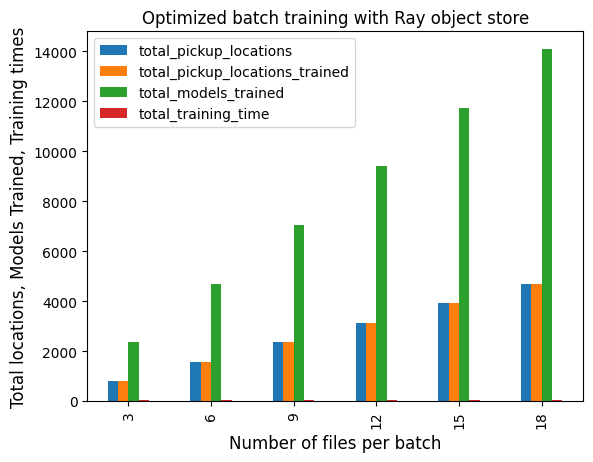

(scheduler +21m3s) Removing 1 nodes of type worker-node-type-0 (idle).
(scheduler +21m19s) Resized to 48 CPUs.


In [10]:
# Plot some times
all_stats_times_df.plot(kind="bar")

plt.ylabel("Total locations, Models Trained, Training times", fontsize=12)
plt.xlabel("Number of files per batch", fontsize=12)
plt.title("Optimized batch training with Ray object store")

plt.grid(False)
plt.show()

In [11]:
ray.shutdown()